# 2-body and 3-body Systems with Python

In this notebook we will explore the two body system and the three body system, as well as the differences between them. We all are quite familiar wioth the two body problem. In fact, we experience it every day as the Earth orbits around the Sun. We know that the Earth's orbit is closed and the system experiences no chaos. The two body problem was most priminently brought into discussion by Johannes Kepler who proposed a two body problem between the Sun and Earth, or any body orbiting another in space. The two body problem has since been solved completely for all scenarios. Isaac Newton was first to introduce the issue which arose if the Moon was added to the Earth-Sun system. Although the Earth-Moon-Sun system is in fact a three body system, due to the relativeley small size of the Earth an Moon when compared to the Sun makes their effect on the SUn negligible. Another example of the three body system is in the Proxima Centauri system. Read about it here: https://en.wikipedia.org/wiki/Alpha_Centauri. You will be asked to first model the stars Alpha Centauri A and B and finally add the third star, Alpha Centauri C, to the orbit. As it turns out, the three body problem is impossible to solve analytically and requires numerical solutions, outside of a few special cases. So we're gonna have to use some integrastion techniques!

To do this problem, we need to recall some basics of gravitation from Newtonian Mechanics. Below, start with Newton's second law and use it to derive two eqautions of motion, one for $\frac{d\vec{v}}{dt}$ and one for $\frac{d\vec{r}}{dt}$, in terms of $\vec{v}$, $\vec{r}$, $m_i$, $m_j$, and $G$(the gravitational constant). Say that the force is directed from $i$ to $j$. Make sure to use correct vector notation.

Answer here

Another useful concept to keep in mind is the centre of mass of a system. The centre of mass is a point where the the sum of the all the mass moments of the system is zero — in simple terms, you can imagine it as the point where the whole mass of the system is balanced. The formula is simple:

$\vec{r}_{com}=\frac{\sum_{i=1}^{n} m_i\vec{r}_{i}}{\sum_{i=1}^{n} m_i}$

And similarly for the velocity at the center of mass:

$\vec{v}_{com}=\frac{\sum_{i=1}^{n} m_i\vec{v}_{i}}{\sum_{i=1}^{n} m_i}$

In this notebook we will be using scipy which is the python tool for differential equations and other calculus tools. 

In [36]:
#Import scipy
import scipy as sci
#We'll use numpy as well
import numpy as np

#We will want to plot in 3D, thus we import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

Let's start with modeling the two-body problem! We first need do non-dimenssionalize the equations you have defined above. To do so, you need to get two constants $K_1$ and $K_2$. Write these out in the  markdown cell below. Then, use the characterstic quantities for mass, distance, velocity, and time, to get numerical quantities for $K_1$ and $K_2$.

Answer here:

In [28]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2, this is not a characteristic quantity but you need it in your equation!
#Reference quantities
m_c=1.989e+30 #kg #mass of the sun
r_c=5.326e+12 #m #distance between stars in Alpha Centauri
v_c=30000 #m/s #relative velocity of earth around the sun
t_c=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

In [ ]:
#Answer net conatants here:
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

Now we define the masses... Let' take Centauri A to be 1.1 characteristic masses and Centauri B to be 0.91

In [30]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.91 #Alpha Centauri B

Next we must choose some initial position vectors for the planets. Once again, these are all in characteristic legths.

In [31]:
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m

Next, we're going to want to make these vectors into numpy arrays so that we can do computations with them as vectors. Do this yourself! Make two arrays for r1 and r2 using the scipy array command. If needed look up the scipy module online!

In [37]:
#Answer
#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

For the next step we need to combine our two arrays into a joint array (think center of mass). Use the formulas from above.

In [38]:
#answer
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

Now, repeat the same process as above using v1=[0.01,0.01,0] and v2=[-0.05,0,-0.1]

In [39]:
#answer
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

We are now ready to set up our ODE and solve for the equations of motion. This is done below for you in the function TwoBodyEquations. Please explain what each line does thoroughly. Make sure to state what are the parameters of the function and what it returns.

In [43]:
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=np.linalg.norm(r2-r1) 
    dv1dt=K1*m2*(r2-r1)/r**3
    dv2dt=K1*m1*(r1-r2)/r**3
    dr1dt=K2*v1
    dr2dt=K2*v2
    r_derivs=np.concatenate((dr1dt,dr2dt))
    derivs=np.concatenate((r_derivs,dv1dt,dv2dt))
    return derivs

Next we must implement the function by using scipy's built in odeint function which will evaluate and solve the differential equation for us. Look up scipy.integrate module and make sure you understand how it works before moving on.

As you have read, to use odeint we need to have initial values and time series for our IVP in order for scipy to solve it. Make an array of initial values and flatten the array so that it is 1D. Then, use np.linspace in order to make a time series from 0 to 8 with 500 points. Finally use scipy.integrate to integrate the function above given the initial vectors from before. Don't forget to import scipy.integrate.

In [42]:
#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=np.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

Next, we want to separate the solution into two parts, one for the first orbit and one for the second. I called the solution two_body_sol, so you may need to rename your or change the code below slightly. No need to write anything but notcie how I separate the solutions.

In [44]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

Finally we're ready to plot!!! This is done for you once more. Please go through each line and comment on what is being done.

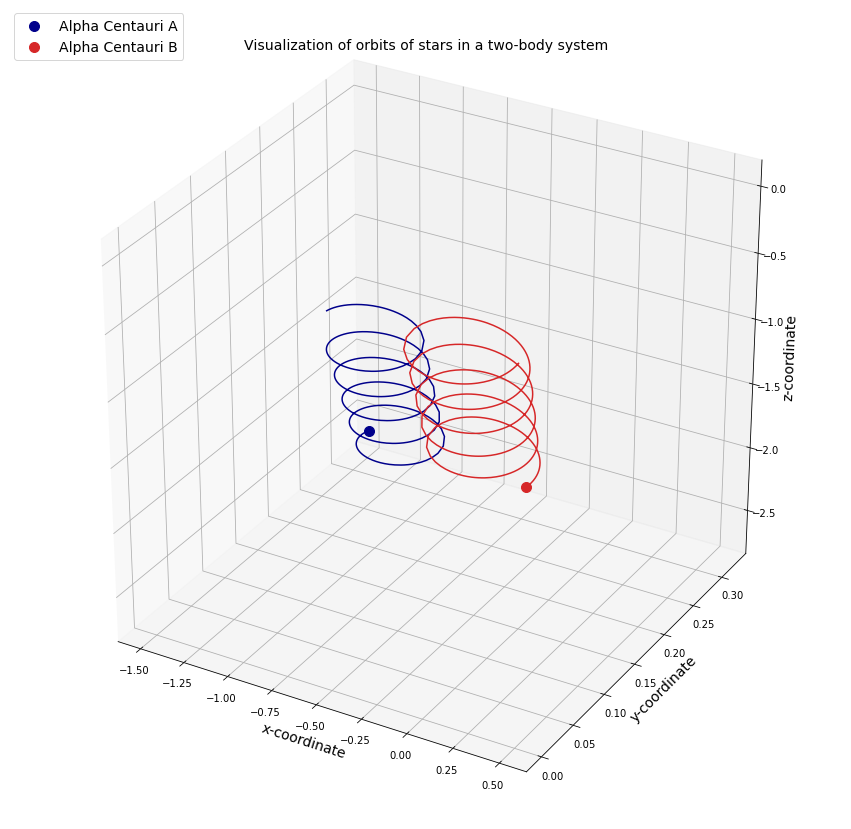

In [45]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection="3d")
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

We can also plot these a different way plotting the orbits from Cenaturi A and B with respect to COM. Create these arrays from the above solutions and plot them just like we did above. Feel free to copy the above plotting code, but make sure you make the appropriate changes.

In [46]:
#answer:::
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

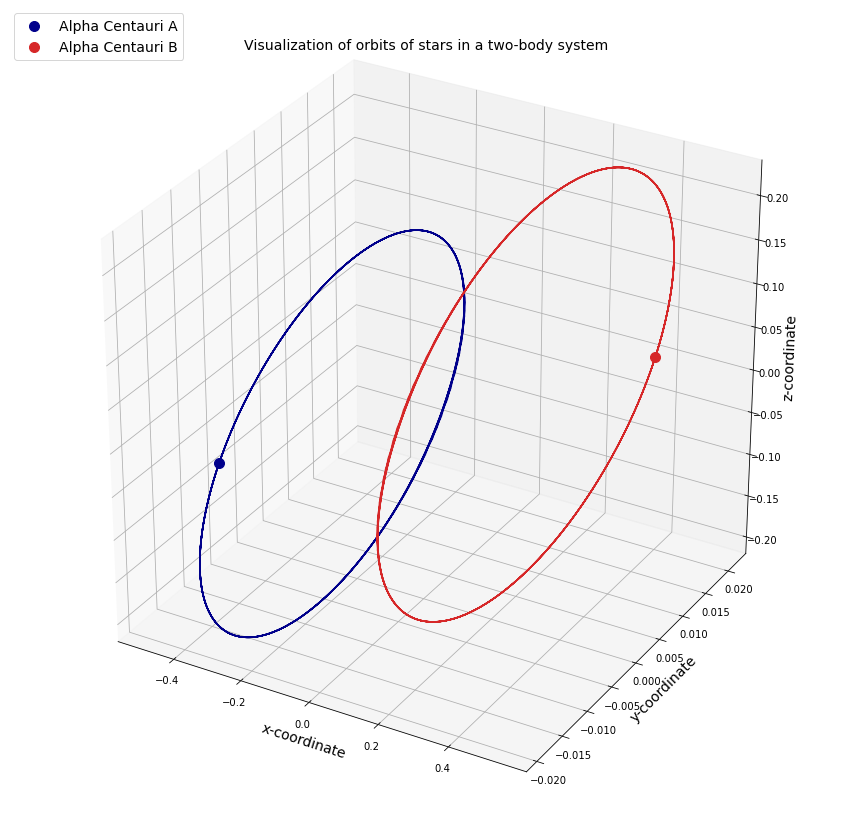

In [21]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

Now it is time to add the third body to the party! Below I give you the third stars mass and initial position vector in dimensionless form. Follow the steps above to create another arrays, COM vectors, another function which gives the derivatives, integrate the IVP, and finally plot the results! Note: You may copy paste the function from above and alter it but remember that there are more derivatives which need to be solved due to the third body interacting with both star A and B. Your final product should be two plots for all three stars A, B, and C as well as comments throughout your code (when needed) and a brief description of your results. Did you expect what you got? Does it seem correct? What noticeable differences are there between the two body and three body system.

In [53]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m


In [61]:
#Answer from here on down::::
r3=np.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=np.array(v3,dtype="float64")
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [55]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=np.linalg.norm(r2-r1)
    r13=np.linalg.norm(r3-r1)
    r23=np.linalg.norm(r3-r2)
    
    dv1dt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2dt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3dt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1dt=K2*v1
    dr2dt=K2*v2
    dr3dt=K2*v3
    r12_derivs=np.concatenate((dr1dt,dr2dt))
    r_derivs=np.concatenate((r12_derivs,dr3dt))
    v12_derivs=np.concatenate((dv1dt,dv2dt))
    v_derivs=np.concatenate((v12_derivs,dv3dt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [56]:
#Package initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=np.linspace(0,20,500) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [57]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

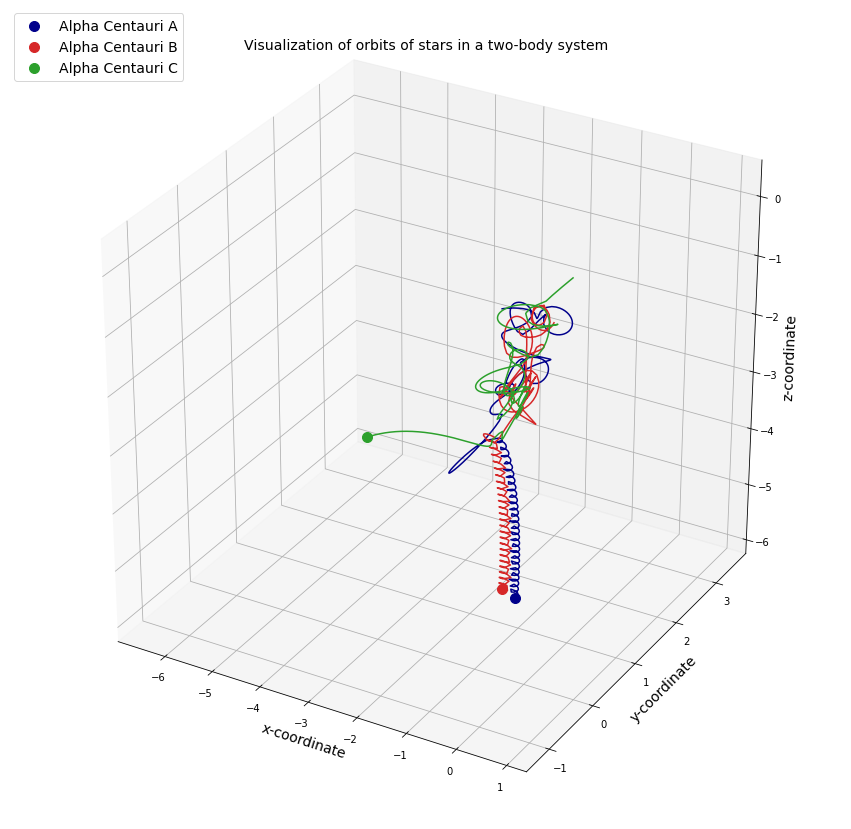

In [58]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="Alpha Centauri C")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [59]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol
#Find location of Alpha Centauri C w.r.t COM
r3com_sol=r3_sol-rcom_sol

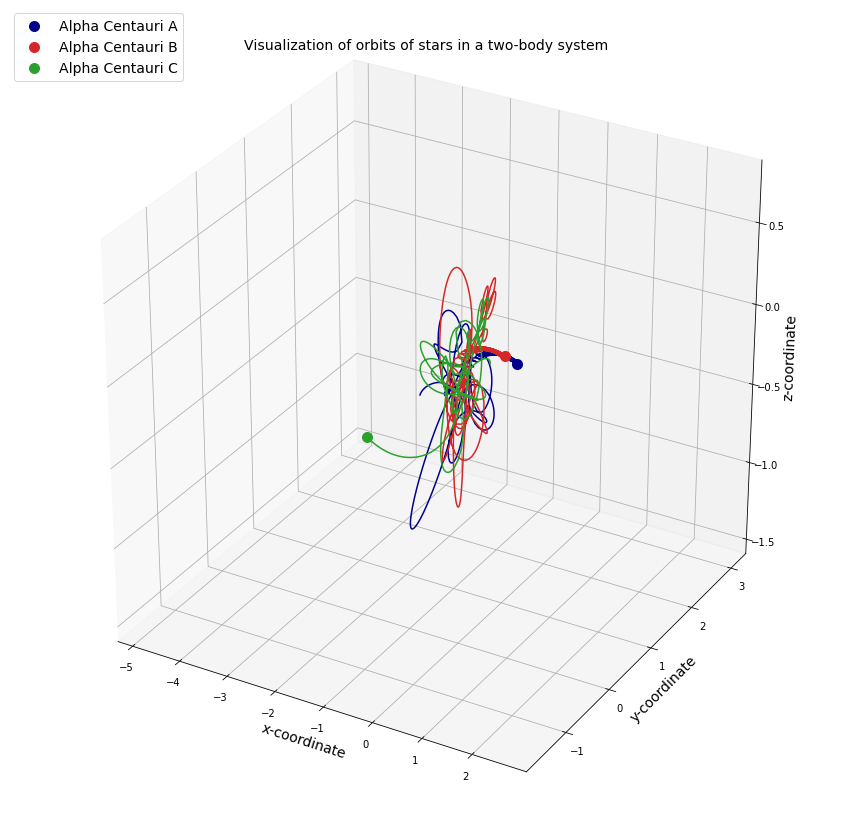

In [60]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")
ax.plot(r3com_sol[:,0],r3com_sol[:,1],r3com_sol[:,2],color="tab:green")
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3com_sol[-1,0],r3com_sol[-1,1],r3com_sol[-1,2],color="tab:green",marker="o",s=100,label="Alpha Centauri C")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

Comment here:::::